In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [77]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [78]:
df = df.fillna(df.mean())

# 1) 100, None, None

In [79]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 100,
                                 max_depth = None,
                                 max_features = None)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

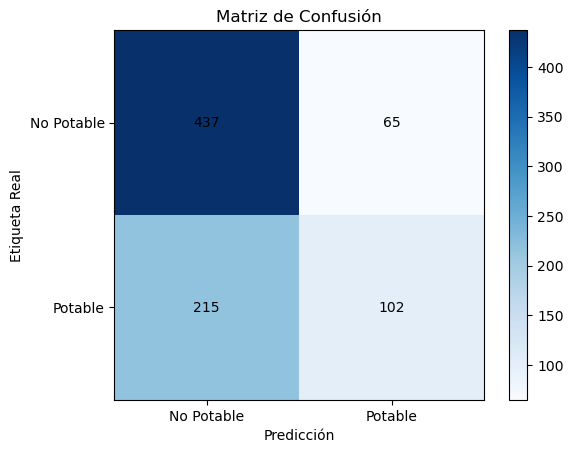

In [80]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


In [81]:
max_depths = [estimator.tree_.max_depth for estimator in rfc.estimators_]

max(max_depths)

39

# 2) 100, 25, None

In [36]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 100,
                                 max_depth = 25,
                                 max_features = None)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

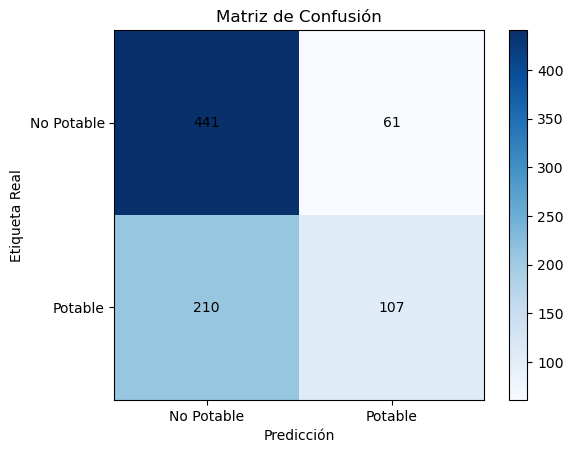

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


# 3) 100, 10, None

In [38]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 100,
                                 max_depth = 10,
                                 max_features = None)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

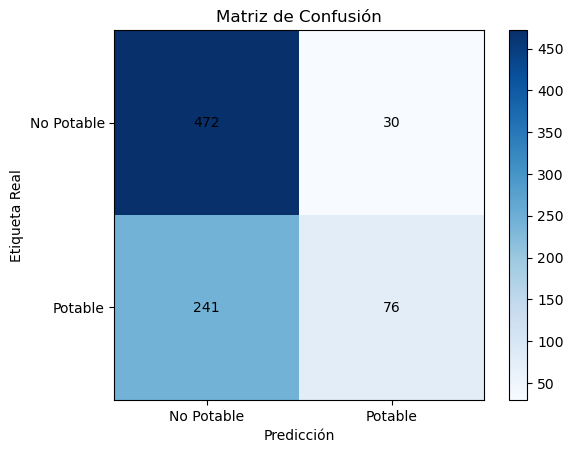

In [39]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


# 4) 100, None, Square Root

In [40]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 100,
                                 max_depth = None,
                                 max_features = 'sqrt')

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

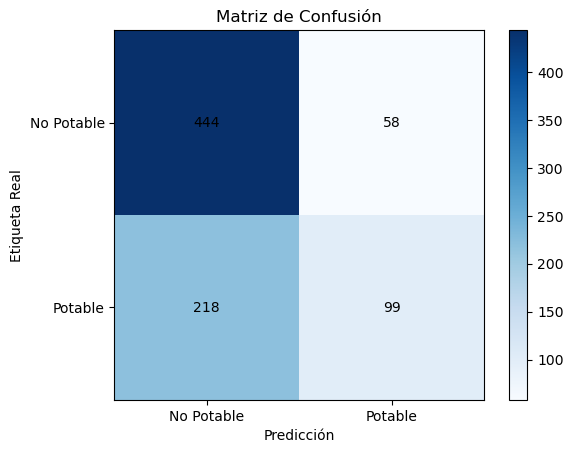

In [41]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


# 5) 100, 25, Square Root

In [42]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 100,
                                 max_depth = 25,
                                 max_features = 'sqrt')

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

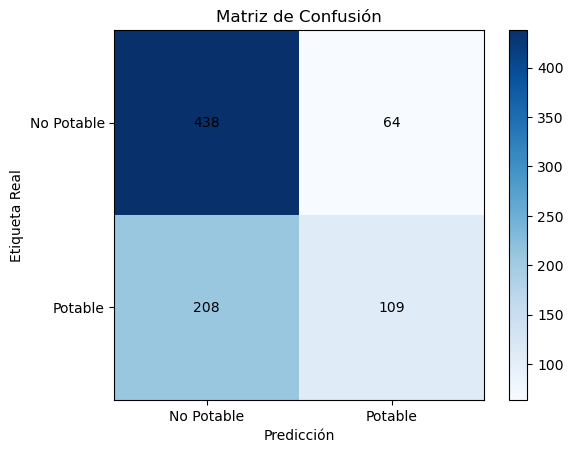

In [43]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


# 6) 100, 10, Square Root

In [44]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 100,
                                 max_depth = 10,
                                 max_features = 'sqrt')

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

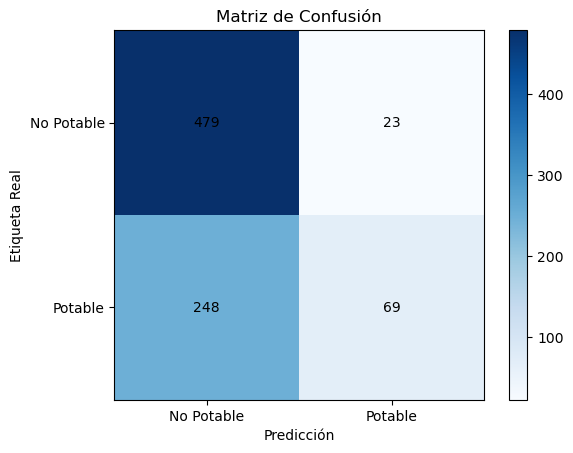

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


# 7) 50, None, None

In [46]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 50,
                                 max_depth = None,
                                 max_features = None)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

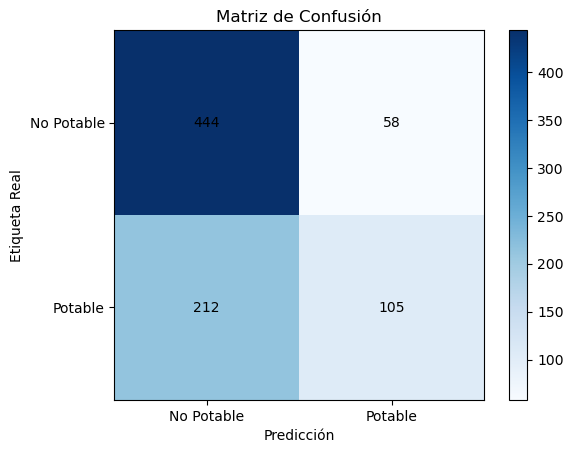

In [47]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


# 8) 50, 25, None

In [48]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 50,
                                 max_depth = 25,
                                 max_features = None)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

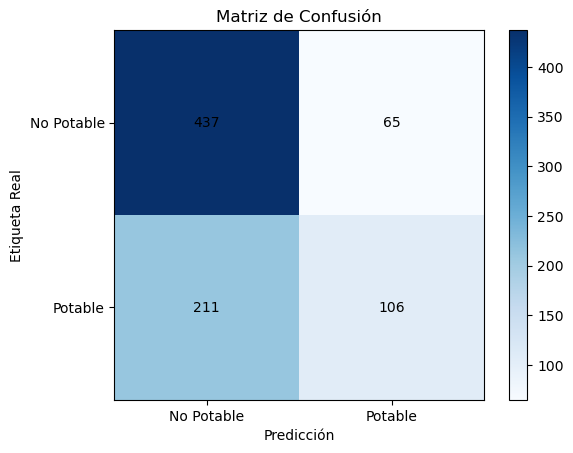

In [49]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


# 9) 50, 10, None

In [50]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 50,
                                 max_depth = 10,
                                 max_features = None)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

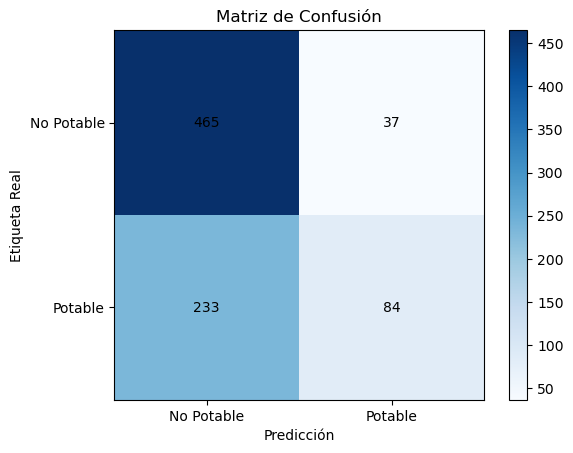

In [51]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


# 10) 50, None, Square Root

In [52]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 50,
                                 max_depth = None,
                                 max_features = 'sqrt')

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

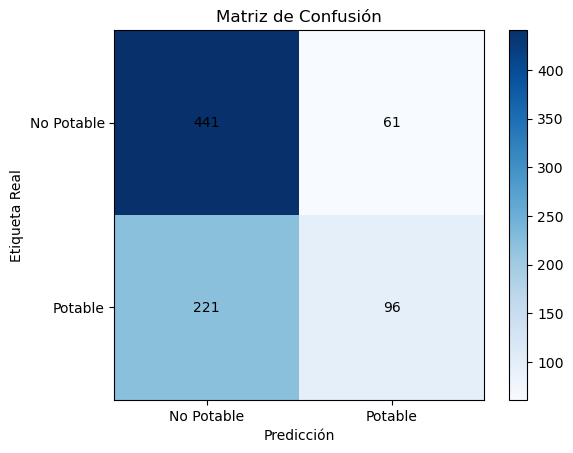

In [53]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


# 11) 50, 25, Square Root

In [54]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 50,
                                 max_depth = 25,
                                 max_features = 'sqrt')

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

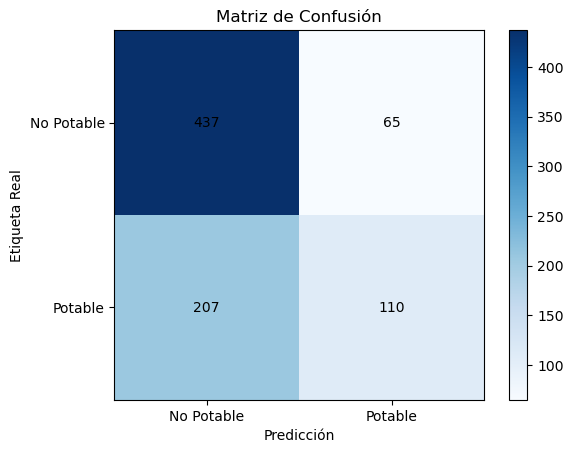

In [55]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


# 12) 50, 10, Square Root

In [56]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 50,
                                 max_depth = 10,
                                 max_features = 'sqrt')

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

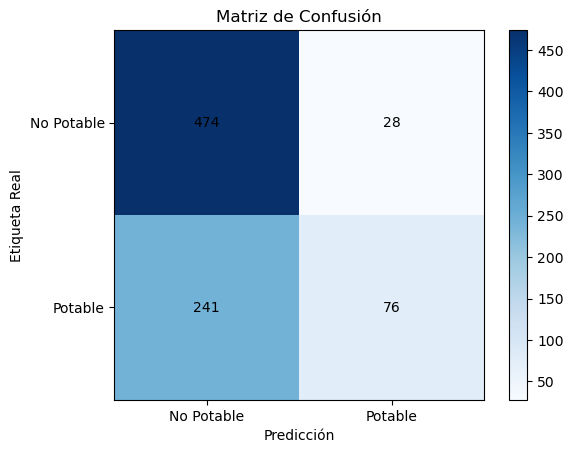

In [57]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


# 13) 25, None, None

In [58]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 25,
                                 max_depth = None,
                                 max_features = None)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

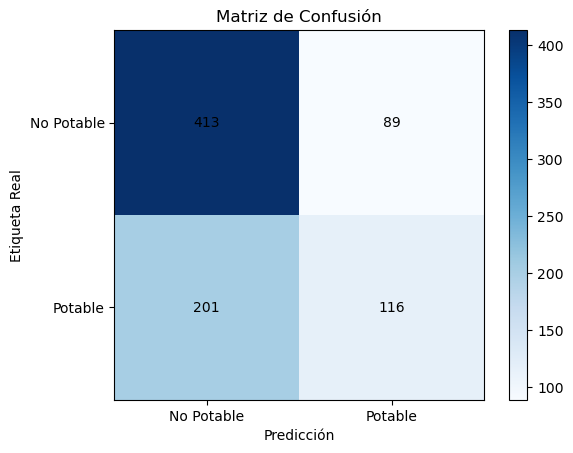

In [59]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


# 14) 25, 25, None

In [60]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 25,
                                 max_depth = 25,
                                 max_features = None)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

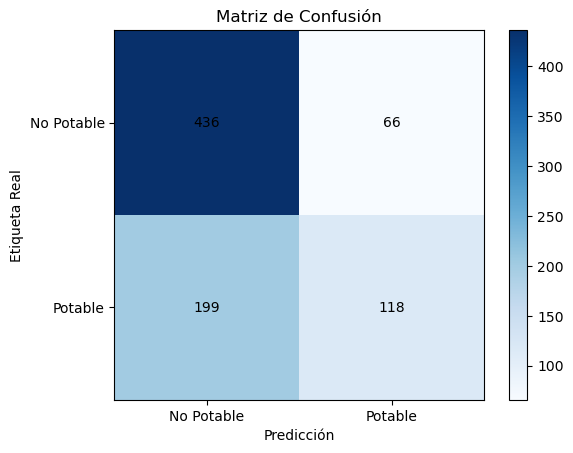

In [61]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


# 15) 25, 10, None

In [62]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 25,
                                 max_depth = 10,
                                 max_features = None)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

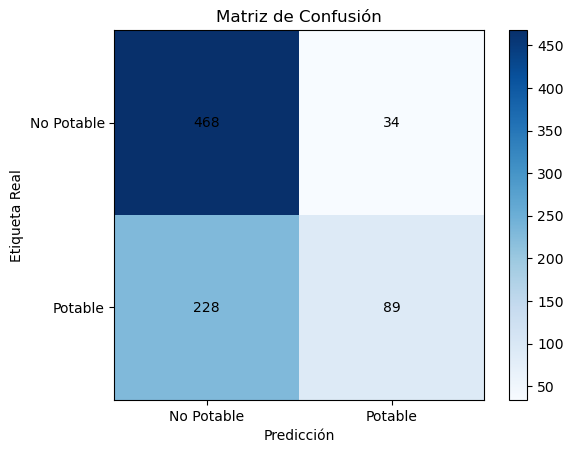

In [63]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


# 16) 25, None, Square Root

In [64]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 25,
                                 max_depth = None,
                                 max_features = 'sqrt')

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

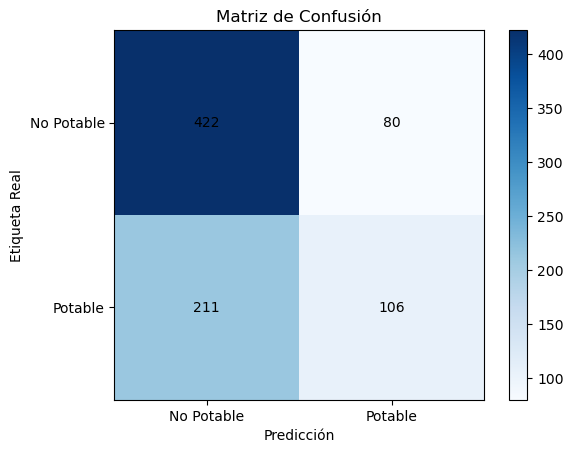

In [65]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


# 17) 25, 25, Square Root

In [66]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 25,
                                 max_depth = 25,
                                 max_features = 'sqrt')

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

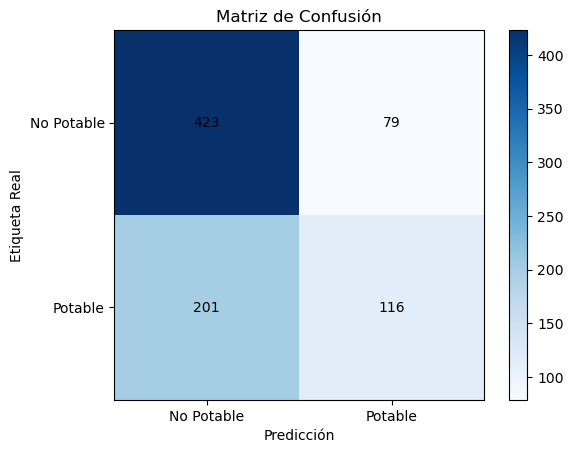

In [67]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()


# 18) 25, 10, Square Root

In [68]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
rfc = RandomForestClassifier(n_estimators = 25,
                                 max_depth = 10,
                                 max_features = 'sqrt')

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

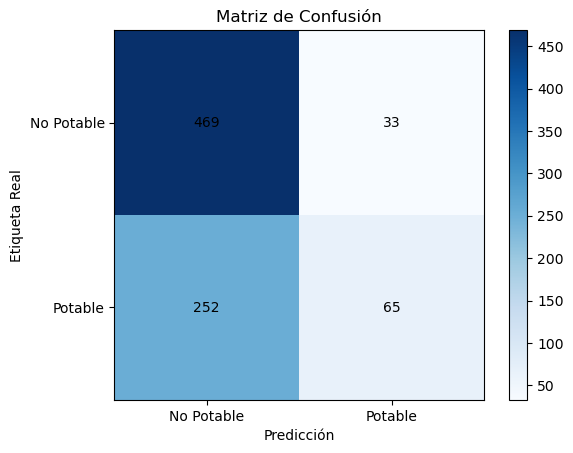

In [69]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.yticks([0, 1], ['No Potable', 'Potable'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black' if cm[i, j] > thresh else 'black')

plt.show()
